In [6]:
import pandas as pd
a='/content/DailyDelhiClimateTrain.csv'
b='/content/DailyDelhiClimateTest.csv'
c=pd.read_csv(train_path)
test_data=pd.read_csv(test_path)
print("\nMissing Values:")
print(c.isnull().sum())


Missing Values:
date            0
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64


In [8]:
print("\nmean values")
print(c.mean(numeric_only=True))
print("\nMedian Values:")
print(c.median(numeric_only=True))
print("\nStandard Deviations:")
print(c.std(numeric_only=True))


mean values
meantemp          25.495521
humidity          60.771702
wind_speed         6.802209
meanpressure    1011.104548
dtype: float64

Median Values:
meantemp          27.714286
humidity          62.625000
wind_speed         6.221667
meanpressure    1008.563492
dtype: float64

Standard Deviations:
meantemp          7.348103
humidity         16.769652
wind_speed        4.561602
meanpressure    180.231668
dtype: float64


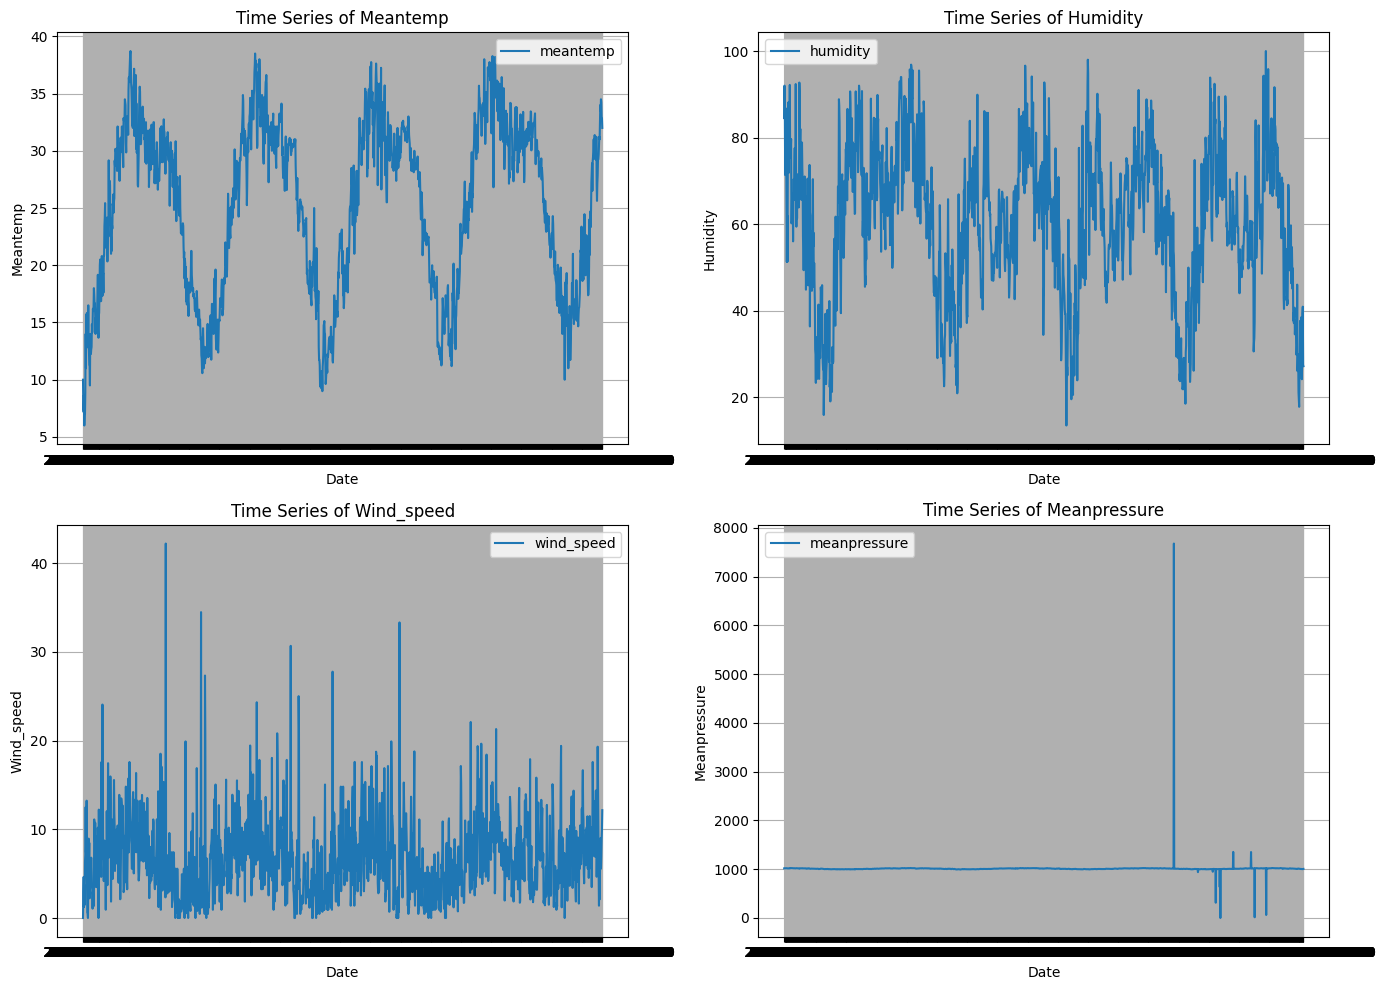

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have loaded your data into a DataFrame called 'combined_data'
# with columns like 'date', 'meantemp', 'humidity', 'wind_speed', 'precipitation'

# Get all column names except 'date' (assuming 'date' is your time index)
variables = [col for col in combined_data.columns if col != 'date']

# Create a figure and subplots dynamically based on the number of variables
num_plots = len(variables)
num_cols = 2  # Number of columns in the subplot grid
num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate number of rows

fig, axes = plt.subplots(num_rows, num_cols, figsize=(14, 10))
axes = axes.flatten()  # Flatten the axes array for easier iteration

# Plot each variable in a separate subplot
for i, var in enumerate(variables):
    ax = axes[i]
    ax.plot(combined_data['date'].astype(str), combined_data[var], label=var, color='tab:blue')
    ax.set_xlabel('Date')
    ax.set_ylabel(var.capitalize())
    ax.set_title(f'Time Series of {var.capitalize()}')
    ax.grid(True)
    ax.legend()

# Hide any extra subplots if the number of variables is not even
for i in range(num_plots, num_rows * num_cols):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

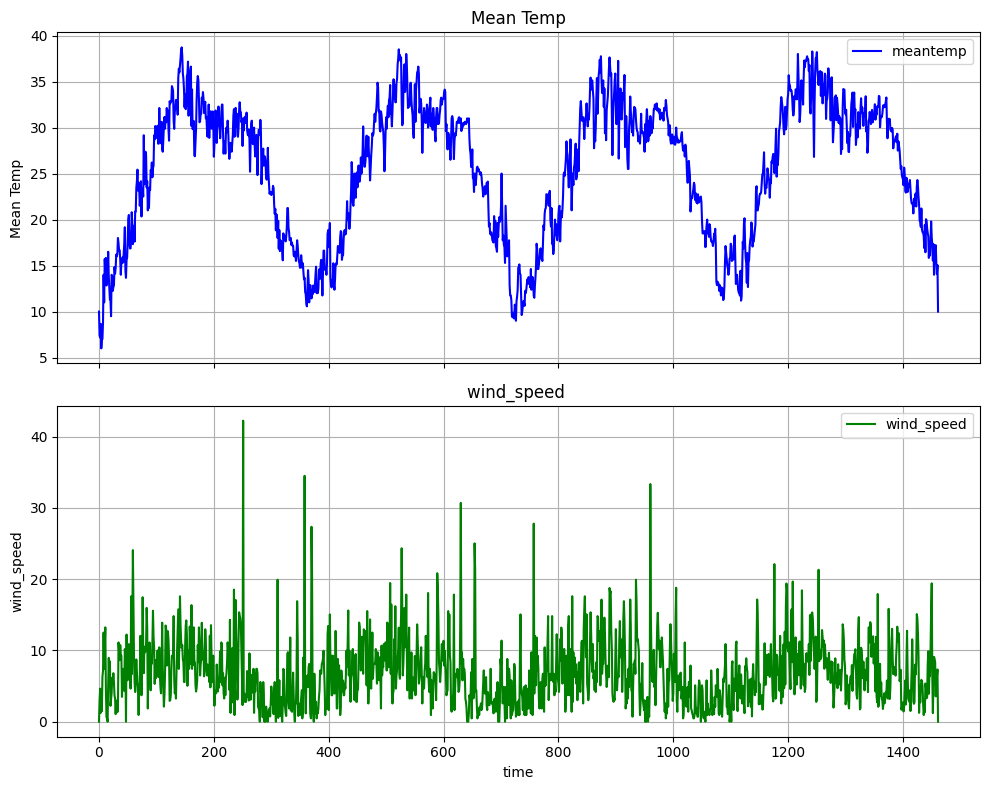

In [22]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the data into a DataFrame
a = pd.read_csv('/content/DailyDelhiClimateTrain.csv')  # Load the data here

# Check if the required columns exist
required_columns = ['meantemp', 'wind_speed']
if all(col in a.columns for col in required_columns):
    # Create subplots
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8), sharex=True)

    # Plot 'meantemp'
    a['meantemp'].plot(ax=axes[0], legend=True, title='Mean Temp', grid=True, color='blue')
    axes[0].set_ylabel('Mean Temp')

    # Plot 'Wind_Speed'
    a['wind_speed'].plot(ax=axes[1], legend=True, title='wind_speed ', grid=True, color='green')
    axes[1].set_ylabel('wind_speed')
    axes[1].set_xlabel('time')

    plt.tight_layout()
    plt.show()
else:
    print("The required columns ('meantemp', 'Wind_Speed') are not present in the dataset.")

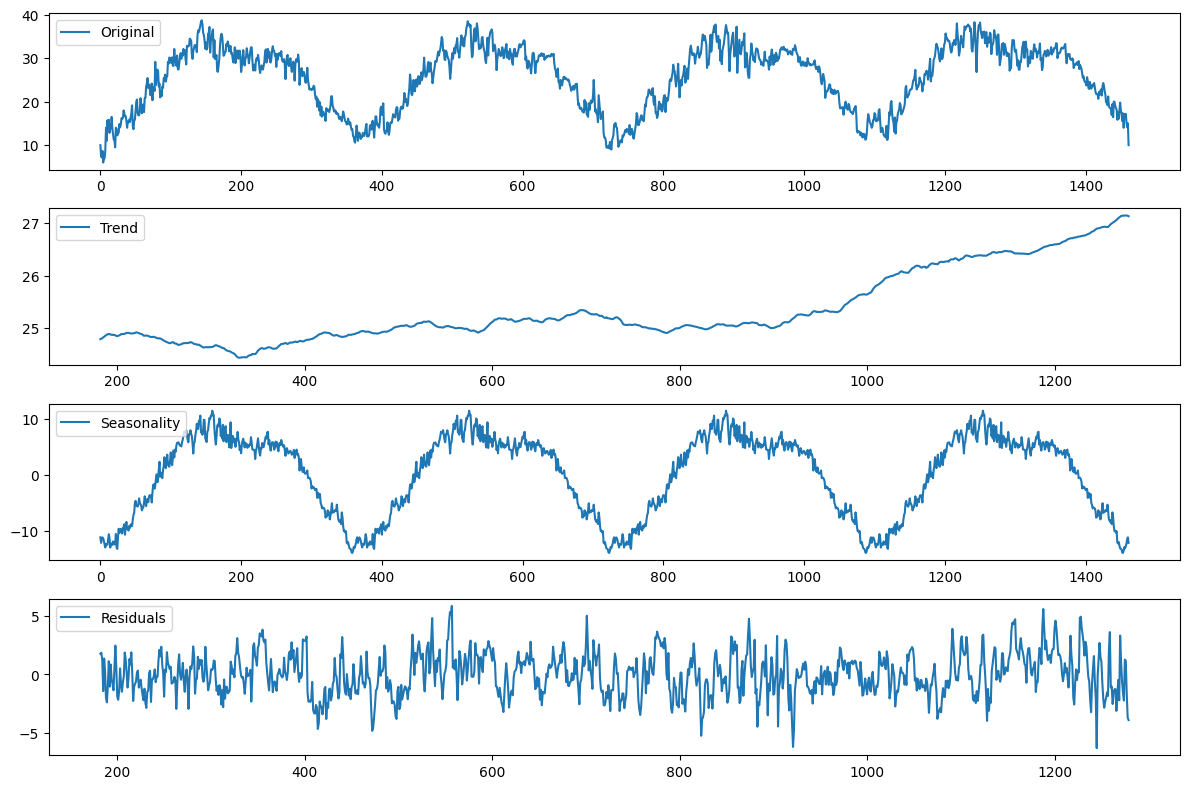

In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose
# Perform seasonal decomposition
decomposition = seasonal_decompose(a['meantemp'], model='additive', period=365)  # Period = 365 for daily data
# Extract components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot the decomposition
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(a['meantemp'], label='Original')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


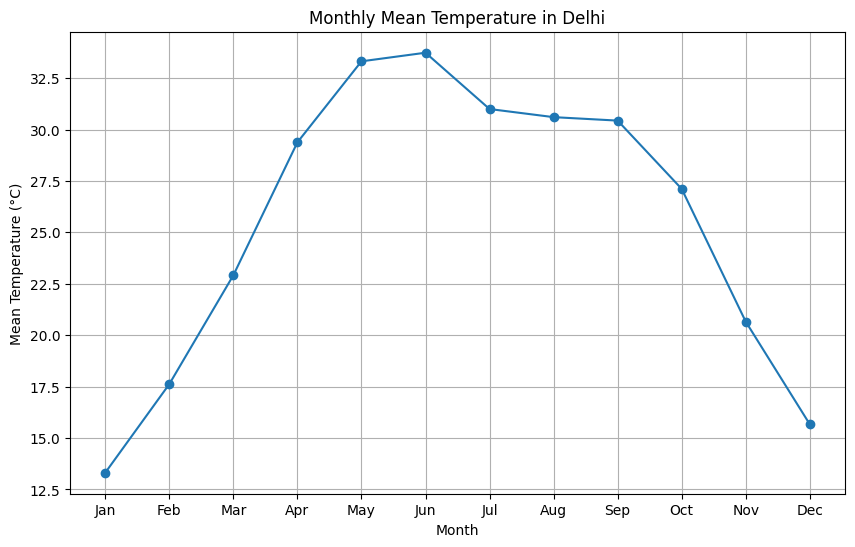

In [24]:
!pip install pandas matplotlib
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('/content/DailyDelhiClimateTrain.csv')

# Convert 'date' column to datetime objects for easier analysis
df['date'] = pd.to_datetime(df['date'])

# Group data by month and calculate the mean for each month
monthly_mean = df.groupby(df['date'].dt.month).mean(numeric_only=True)

# Plot monthly mean temperatures
plt.figure(figsize=(10, 6))
plt.plot(monthly_mean.index, monthly_mean['meantemp'], marker='o')
plt.title('Monthly Mean Temperature in Delhi')
plt.xlabel('Month')
plt.ylabel('Mean Temperature (°C)')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

# You can repeat this for other variables like humidity, wind_speed, and precipitation
# to analyze their seasonal patterns.

MSE: 22.894714047823992


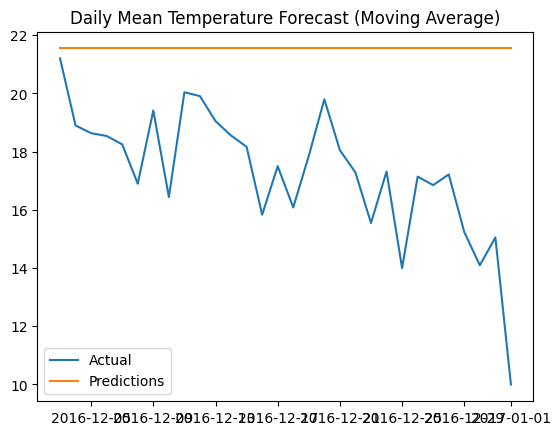

In [25]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('/content/DailyDelhiClimateTrain.csv')
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)


target_variable = 'meantemp'
data = df[target_variable]


train_data = data[:-30]
test_data = data[-30:]


window_size = 7
moving_average = train_data.rolling(window_size).mean()


predictions = [moving_average.iloc[-1]] * len(test_data)

mse = sum([(a - p)**2 for a, p in zip(test_data, predictions)]) / len(test_data)
print('MSE:', mse)


plt.plot(test_data, label='Actual')
plt.plot(test_data.index, predictions, label='Predictions')
plt.legend()
plt.title('Daily Mean Temperature Forecast (Moving Average)')
plt.show()

In [26]:
import pandas as pd


df = pd.read_csv('/content/DailyDelhiClimateTrain.csv')
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)


target_variable = 'meantemp'
data = df[target_variable]

train_size = int(len(data) * 0.8)
train_data = data[:train_size]
test_data = data[train_size:]


print("Training set size:", len(train_data))
print("Testing set size:", len(test_data))

Training set size: 1169
Testing set size: 293


In [28]:

stl = STL(train_data, seasonal=13, period=365)
result = stl.fit()

t aligned with the test data's index
forecast_seasonal = result.seasonal[-len(test_data):].values
forecast_trend = result.trend[-len(test_data):].values
forecast = forecast_trend + forecast_seasonal


mae = mean_absolute_error(test_data, forecast)
rmse = np.sqrt(mean_squared_error(test_data, forecast))

print("MAE:", mae)
print("RMSE:", rmse)

MAE: 6.666020309236258
RMSE: 8.195881525626524
